In [1]:
import pandas as pd
import numpy as np

In [2]:
with open('./data/CAN traffic (normal only).txt', 'r') as f:
  normal_data_list = [line.rstrip().split("\t") for line in f]

In [3]:
with open('./data/CAN traffic (attack included).txt', 'r') as f:
  abnormal_data_list = [line.rstrip().split("\t") for line in f]

In [4]:
normal_data_df = pd.DataFrame(normal_data_list, columns=['Timestamp', 'Arbitration ID', 'DLC', 'data', 'Class'])
abnormal_data_df = pd.DataFrame(abnormal_data_list, columns=['Timestamp', 'Arbitration ID', 'DLC', 'data', 'Class', 'SubClass'])

In [5]:
# The number of distinct CAN IDs
normal_num_ID = len(set(normal_data_df['Arbitration ID'].values))
abnormal_num_ID = len(set(abnormal_data_df['Arbitration ID'].values))

# List of CAN IDs
normal_list_ID = list(set(normal_data_df['Arbitration ID'].values)) # set 함수를 이용하여 중복 제거
abnormal_list_ID = list(set(abnormal_data_df['Arbitration ID'].values)) # set 함수를 이용하여 중복 제거


In [6]:
print('The number of distinct Normal CAN IDs:',normal_num_ID)
print('The number of distinct Abnormal CAN IDs:',abnormal_num_ID)
print(normal_list_ID)
print(abnormal_list_ID)

The number of distinct Normal CAN IDs: 73
The number of distinct Abnormal CAN IDs: 81
['368', '541', '367', '500', '484', '153', '47F', '4F1', '2B0', '479', '420', '485', '568', '48A', '42D', '410', '553', '5CD', '07F', '572', '4A2', '4A9', '140', '593', '389', '470', '49F', '453', '4A7', '53B', '387', '544', '4CB', '507', '260', '38D', '563', '50C', '381', '490', '436', '44E', '53E', '220', '130', '251', '492', '57F', '421', '329', '366', '340', '495', '5B0', '483', '50A', '4C9', '58B', '50E', '5BE', '356', '412', '48C', '52A', '559', '391', '5A6', '164', '43', '394', '53F', '520', '386']
['47F', '4F1', '2B0', '485', '5CD', '7D4', '4A2', '544', '507', '50C', '7C4', '381', '251', '329', '5BE', '412', '559', '5A6', '50A', '520', '368', '541', '7D8', '484', '42D', '479', '420', '07F', '572', '389', '4A7', '260', '7DC', '436', '53E', '44E', '492', '7D0', '421', '50E', '483', '48A', '553', '140', '593', '470', '453', '0', '4CB', '563', '38D', '7CC', '490', '220', '57F', '366', '340', '4C9'

In [16]:
normal_data_df['Timestamp'] = normal_data_df['Timestamp'].apply(int)
abnormal_data_df['Timestamp'] = abnormal_data_df['Timestamp'].apply(int)

In [17]:
import matplotlib.pyplot as plt

def show_fig_time_interval(CAN_ID):
  previous_timestamp = 0
  interval_list = []
  num = 0
  for index, msg in normal_data_df.iterrows():
    if msg['Arbitration ID'] == CAN_ID:
      interval = msg['Timestamp'] - previous_timestamp
      previous_timestamp = msg['Timestamp']
      interval_list.append(interval)
      num += 1
  interval_list = interval_list[1:]

  print("The number of CAN Msgs:", num)
  plt.plot(interval_list)
  plt.ylabel("Sec")
  plt.title('Time Interval\n CAN ID: ' + CAN_ID)
  plt.rcParams["figure.figsize"] = (20,7)
  plt.show()

The number of CAN Msgs: 746


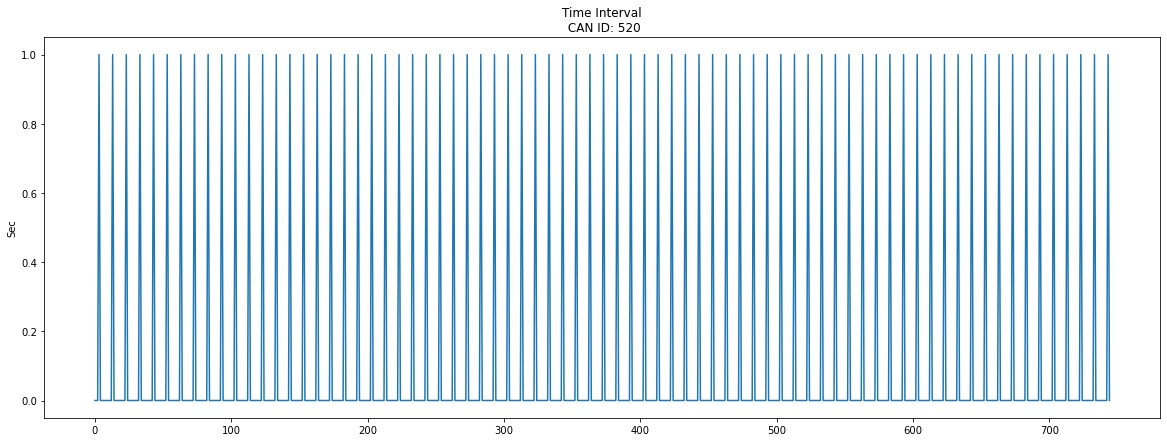

In [20]:
CAN_ID = '520'
show_fig_time_interval(CAN_ID)

The number of CAN Msgs: 7466


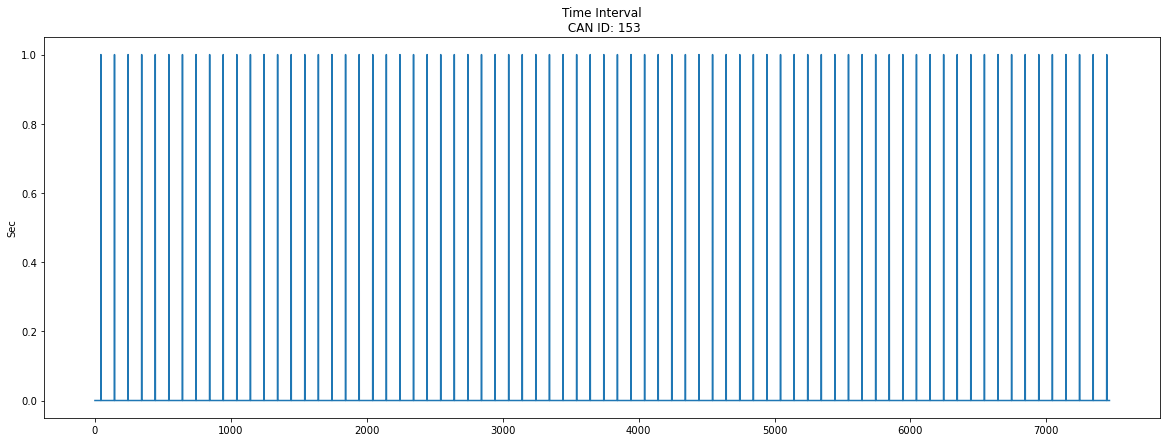

In [21]:
CAN_ID = '153'
show_fig_time_interval(CAN_ID)

In [22]:
import matplotlib.pyplot as plt

def show_fig_time_interval(CAN_ID):
  previous_timestamp = 0
  interval_list = []
  num = 0
  for index, msg in abnormal_data_df.iterrows():
    if msg['Arbitration ID'] == CAN_ID:
      interval = msg['Timestamp'] - previous_timestamp
      previous_timestamp = msg['Timestamp']
      interval_list.append(interval)
      num += 1
  interval_list = interval_list[1:]

  print("The number of CAN Msgs:", num)
  plt.plot(interval_list)
  plt.ylabel("Sec")
  plt.title('Time Interval\n CAN ID: ' + CAN_ID)
  plt.rcParams["figure.figsize"] = (20,7)
  plt.show()

In [25]:
print(set(abnormal_list_ID) - set(normal_list_ID))

{'7D8', '0', '7D0', '4A4', '7DC', '7CC', '7C4', '7D4'}


The number of CAN Msgs: 246


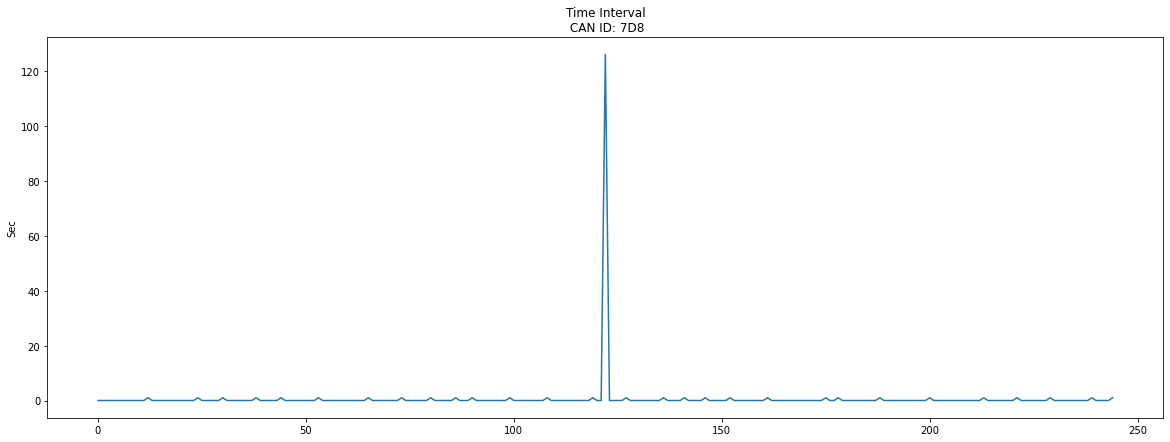

In [29]:
Abnormal_CAN_ID = '7D8'
show_fig_time_interval(Abnormal_CAN_ID)

The number of CAN Msgs: 38521


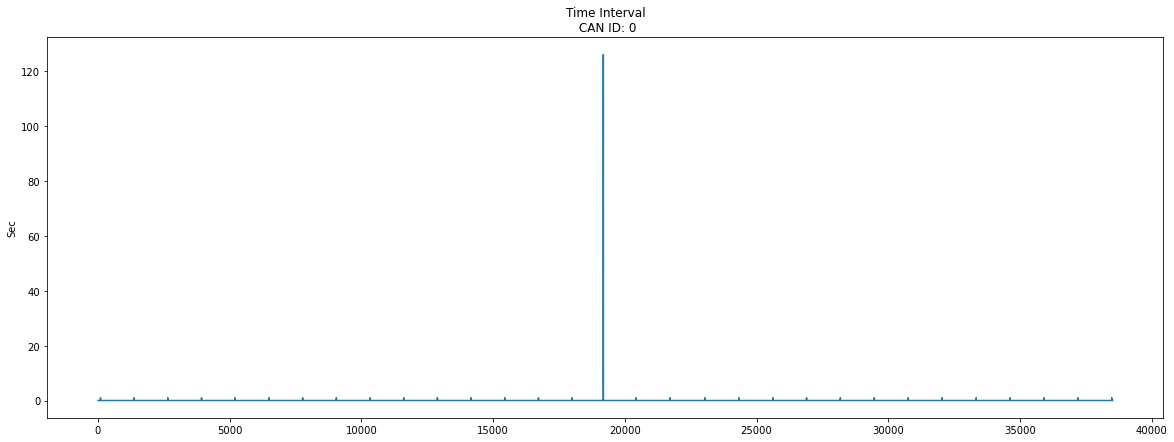

In [30]:
Abnormal_CAN_ID = '0'
show_fig_time_interval(Abnormal_CAN_ID)

The number of CAN Msgs: 255


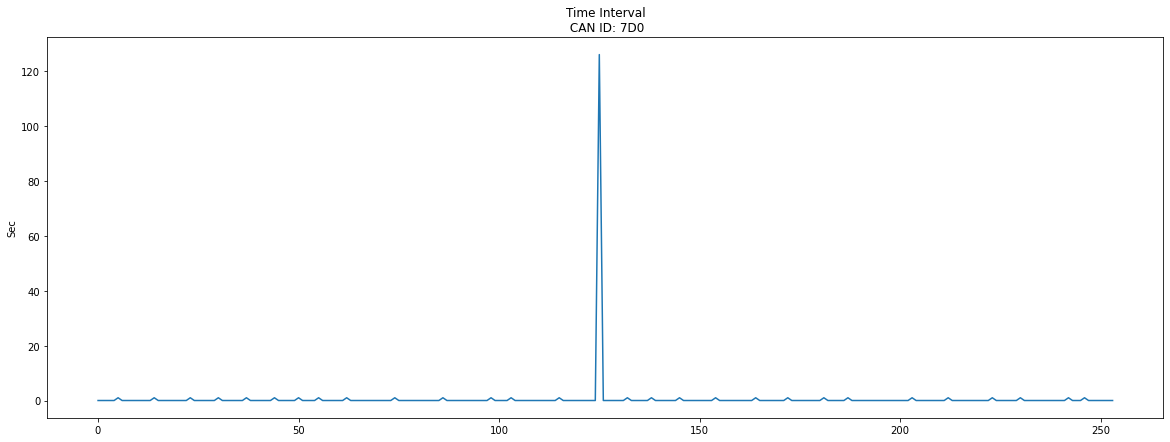

In [31]:
Abnormal_CAN_ID = '7D0'
show_fig_time_interval(Abnormal_CAN_ID)

The number of CAN Msgs: 295


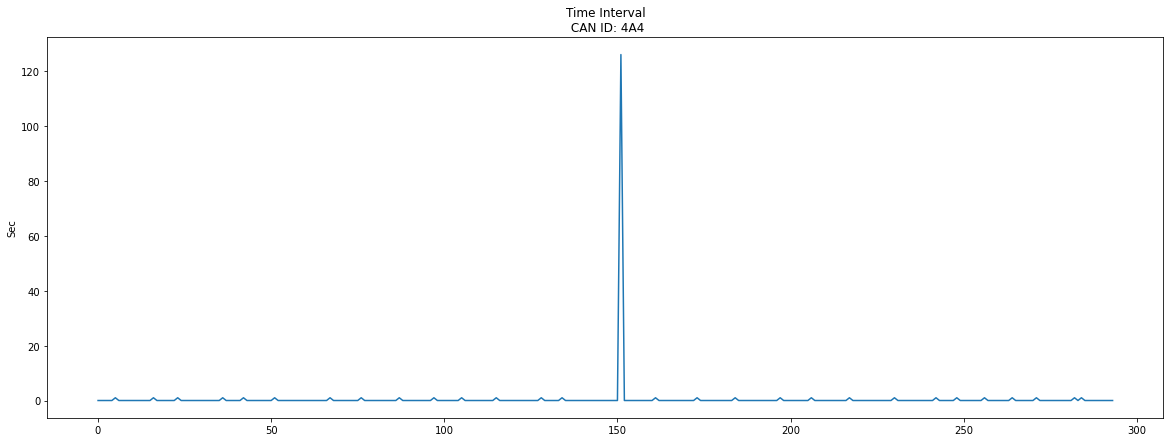

In [32]:
Abnormal_CAN_ID = '4A4'
show_fig_time_interval(Abnormal_CAN_ID)

In [50]:
abnormal_data_df['is_abnormal'] = 0

In [51]:
abnormal_data_df.head()

,Timestamp,Arbitration ID,DLC,data,Class,SubClass,is_abonormal,is_abnormal
0,1597759710,153,8,20 A1 10 FF 00 FF 50 1F,Normal,Normal,0,0
1,1597759710,220,8,13 24 7F 60 05 FF BF 10,Normal,Normal,0,0
2,1597759710,507,4,08 00 00 01,Normal,Normal,0,0
3,1597759710,356,8,00 00 00 80 16 00 00 00,Normal,Normal,0,0
4,1597759710,340,8,FC 03 00 E4 B7 21 FA 3C,Normal,Normal,0,0


In [35]:
Abnormal_CAN_ID_list = set(abnormal_list_ID) - set(normal_list_ID)

In [39]:
print(Abnormal_CAN_ID_list)

{'7D8', '0', '7D0', '4A4', '7DC', '7CC', '7C4', '7D4'}


In [45]:
Abnormal_CAN_ID_list = list(Abnormal_CAN_ID_list)

In [46]:
Abnormal_CAN_ID_list

['7D8', '0', '7D0', '4A4', '7DC', '7CC', '7C4', '7D4']

In [48]:
abnormal_data_df['Arbitration ID'].head()

0    153
1    220
2    507
3    356
4    340
Name: Arbitration ID, dtype: object

In [52]:
for i in range(len(abnormal_data_df)):
  if abnormal_data_df['Arbitration ID'].loc[i] in Abnormal_CAN_ID_list:
    abnormal_data_df['is_abnormal'].loc[i] = 1

C:\Users\wlsrn\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [55]:
abnormal_data_df.loc[331056]

Timestamp                      1597759838
Arbitration ID                        7D8
DLC                                     8
data              7C F4 4A 82 A4 77 5F D3
Class                              Attack
SubClass                          Fuzzing
is_abonormal                            0
is_abnormal                             1
Name: 331056, dtype: object

In [58]:
abnormal_data_df = abnormal_data_df.loc[:, ['Arbitration ID', 'is_abnormal']]

In [59]:
abnormal_data_df.head()

,Arbitration ID,is_abnormal
0,153,0
1,220,0
2,507,0
3,356,0
4,340,0


In [76]:
normal_data_df['is_abnormal'] = 0

In [83]:
train_arbID_seq = abnormal_data_df['is_abnormal'].to_numpy()
test_arbID_seq = normal_data_df['is_abnormal'].to_numpy()

In [124]:
def get_split_arbid_seq_by_wnd(arbidseq, window_size=3):
  splited = np.lib.stride_tricks.as_strided(arbidseq,shape=(np.size(arbidseq)-window_size+1,window_size),strides=(arbidseq.strides[0],arbidseq.strides[0]))
  return splited

In [125]:
import hmmlearn.hmm as hmm

In [126]:
tr_set = get_split_arbid_seq_by_wnd(train_arbID_seq)
te_set = get_split_arbid_seq_by_wnd(test_arbID_seq)

In [127]:
tr_set_size = len(tr_set)
print(tr_set_size)
te_set_size = len(te_set)
print(te_set_size)

806388
179344


In [128]:
h = hmm.GaussianHMM(2) # 모델 파라미터 설정, 모델링 객체 생성
print('--------------------')
h.fit(tr_set) # 학습진행
print(h.score(tr_set)) # log(foward prob)
print(h.score(te_set)/(te_set_size/tr_set_size))
print('--------------------')
print(h.startprob_)
print(h.transmat_)

--------------------
6557093.610478204
7540349.235269721
--------------------
[1. 0.]
[[0.95214175 0.04785825]
 [0.90751328 0.09248672]]


In [129]:
h = hmm.GaussianHMM(3) # 모델 파라미터 설정, 모델링 객체 생성
print('--------------------')
h.fit(tr_set) # 학습진행
print(h.score(tr_set)) # log(foward prob)
print(h.score(te_set)/(te_set_size/tr_set_size))
print('--------------------')
print(h.startprob_)
print(h.transmat_)

--------------------
12570199.157833483
13615950.399765275
--------------------
[1. 0. 0.]
[[0.95762871 0.04237129 0.        ]
 [0.         0.09248654 0.90751346]
 [0.84298508 0.15701492 0.        ]]
